# Happiness Report Dataset

- 데이터 셋 : https://www.kaggle.com/mathurinache/world-happiness-report
- GDP, 기대수명과 같은 평가기준을 통해 각 나라의 행복도를 정리한 데이터. 전문기관에서 조사한 데이터이기에 잘 정리 되어 있고 점수로 표시 되어 있다는 특징이 있다. 변수간의 상관관계와 행복에 미치는 영향을 알아보고자 한다.
- 또한 변수들을 정리하여 표로 시각화하는 연습을 진행하고자 한다.

## 라이브러리 설정 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = dict()
df['2015'] = pd.read_csv('./happiness/2015.csv')
df['2016'] = pd.read_csv('./happiness/2016.csv')
df['2017'] = pd.read_csv('./happiness/2017.csv')
df['2018'] = pd.read_csv('./happiness/2018.csv')
df['2019'] = pd.read_csv('./happiness/2019.csv')
df['2020'] = pd.read_csv('./happiness/2020.csv')

pd.set_option('display.max_columns', None)

In [2]:
df['2020'].head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [3]:
for key in df:
    print(key, df[key].columns)

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expe

- 각 데이터프레임 컬럼 확인 (연도마다 컬럼이 각각 다름.)
- 연도마다 컬럼이 다르므로 통합이 필요하다.

- Country : 국가
- Region : 국가의 지역
- Happiness Rank : 행복지수 순위
- Happiness Score : 행복지수점수
- GDP per capita : 1인당 GDP
- Healthy Life Expectancy : 건강 기대수명
- Social Support : 사회적 지원
- Freedom to make life choices : 삶에 대한 선택의 자유
- Generosity : 관용
- Corruption Perception : 부정부패
- Dystopia + Residual : 그 외 / Score 점수에서 나머지를 빼면 됨.

In [4]:
# Columns 표준화
cols = ['country', 'score', 'economy', 'family', 'health', 'freedom', 'generosity', 'trust', 'residual']

In [5]:
# Happiness Rank 경우 이 과정을 통해 측정.

df['2015'].drop(['Region', 'Happiness Rank', 'Standard Error'], axis=1, inplace=True) #Trust와 Generosity 순서반대

df['2016'].drop(['Region', 'Happiness Rank', 'Lower Confidence Interval',
                 'Upper Confidence Interval'], axis=1, inplace=True) #Trust와 Generosity 순서반대

df['2017'].drop(['Happiness.Rank', 'Whisker.high', 'Whisker.low'], axis=1, inplace=True) 

df['2018'].drop(['Overall rank'], axis=1, inplace=True) # residual 없음.

df['2019'].drop(['Overall rank'], axis=1, inplace=True) # residual 없음.

df['2020'].drop(['Regional indicator', 'Standard error of ladder score', 
                 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 
                 'Social support', 'Healthy life expectancy', 
                 'Freedom to make life choices', 'Generosity',
                 'Perceptions of corruption', 'Ladder score in Dystopia'], axis=1, inplace=True) 


- 먼저 2018년도 2019년도 'residual' column을 만들어준다.

In [6]:
df['2018'].columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [7]:
df['2018'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1)

0      5.047
1      5.211
2      5.184
3      5.069
4      5.169
       ...  
151    2.249
152    2.675
153    1.564
154    0.595
155    1.153
Length: 156, dtype: float64

In [8]:
df['2019'].columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [9]:
df['2018']['residual'] = df['2018']['Score'] - df['2018'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1)

df['2019']['residual'] = df['2019']['Score'] - df['2019'][['GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1)

- 다음으로 2015년도, 2016년도 Trust와 Generosity 순서를 바꾸어야 한다.

In [10]:
df['2015'].columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [11]:
df['2016'].columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [12]:
df['2015'] = df['2015'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)',
       'Dystopia Residual']]

df['2016'] = df['2016'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)',
        'Dystopia Residual']]

- 모든 연도의 컬럼명을 통일해준다.

In [13]:
for year in df:
    df[year].columns = cols

In [14]:
df['2015'].head()

,country,score,economy,family,health,freedom,generosity,trust,residual
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176


### 데이터 통합

In [16]:
df_all = pd.concat(df, axis=0)
# df를 dict타입으로 만듦. dict의 key(년도)가 index로 사용.

df_all.index.names = ['year', 'rank']
# 년도를 year로, 각 나라를 rank로 명명화

df_all.reset_index(inplace=True)
df_all['rank'] += 1
df_all
# 다시 year와 rank를 일반 column으로 변경. rank를 1부터 설정

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,1,Switzerland,7.5870,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2.517380
1,2015,2,Iceland,7.5610,1.302320,1.402230,0.947840,0.628770,0.436300,0.141450,2.702010
2,2015,3,Denmark,7.5270,1.325480,1.360580,0.874640,0.649380,0.341390,0.483570,2.492040
3,2015,4,Norway,7.5220,1.459000,1.330950,0.885210,0.669730,0.346990,0.365030,2.465310
4,2015,5,Canada,7.4270,1.326290,1.322610,0.905630,0.632970,0.458110,0.329570,2.451760
...,...,...,...,...,...,...,...,...,...,...,...
930,2020,149,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
931,2020,150,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
932,2020,151,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
933,2020,152,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [19]:
rank_table = df_all.pivot(index='country', columns='year', values='rank')
rank_table

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Afghanistan,153.0,154.0,141.0,145.0,154.0,153.0
Albania,95.0,109.0,109.0,112.0,107.0,105.0
Algeria,68.0,38.0,53.0,84.0,88.0,100.0
Angola,137.0,141.0,140.0,142.0,NaN,NaN
Argentina,30.0,26.0,24.0,29.0,47.0,55.0
...,...,...,...,...,...,...
Venezuela,23.0,44.0,82.0,102.0,108.0,99.0
Vietnam,75.0,96.0,94.0,95.0,94.0,83.0
Yemen,136.0,147.0,146.0,152.0,151.0,146.0


- 각 나라의 연도별로 행복 순위를 데이터프레임화 해봄.
- 매번 모든 나라가 순위에 드는 것이 아니기에 Nan값이 존재.
- index 기준으로 정리되어 있어 가시화가 미흡.

In [23]:
rank_table.sort_values('2020', inplace=True) # sort_values / values = '2020' 기준으로 정리 
rank_table.head(10)

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Finland,6.0,5.0,5.0,1.0,1.0,1.0
Denmark,3.0,1.0,2.0,3.0,2.0,2.0
Switzerland,1.0,2.0,4.0,5.0,6.0,3.0
Iceland,2.0,3.0,3.0,4.0,4.0,4.0
Norway,4.0,4.0,1.0,2.0,3.0,5.0
Netherlands,7.0,7.0,6.0,6.0,5.0,6.0
Sweden,8.0,10.0,9.0,9.0,7.0,7.0
New Zealand,9.0,8.0,8.0,8.0,8.0,8.0
Austria,13.0,12.0,13.0,12.0,10.0,9.0


## 시각화

In [27]:
rank_table.max() # 기본이 axis=0 

year
2015    158.0
2016    157.0
2017    155.0
2018    156.0
2019    156.0
2020    153.0
dtype: float64

#### 각 나라별 기준 연도별 순위

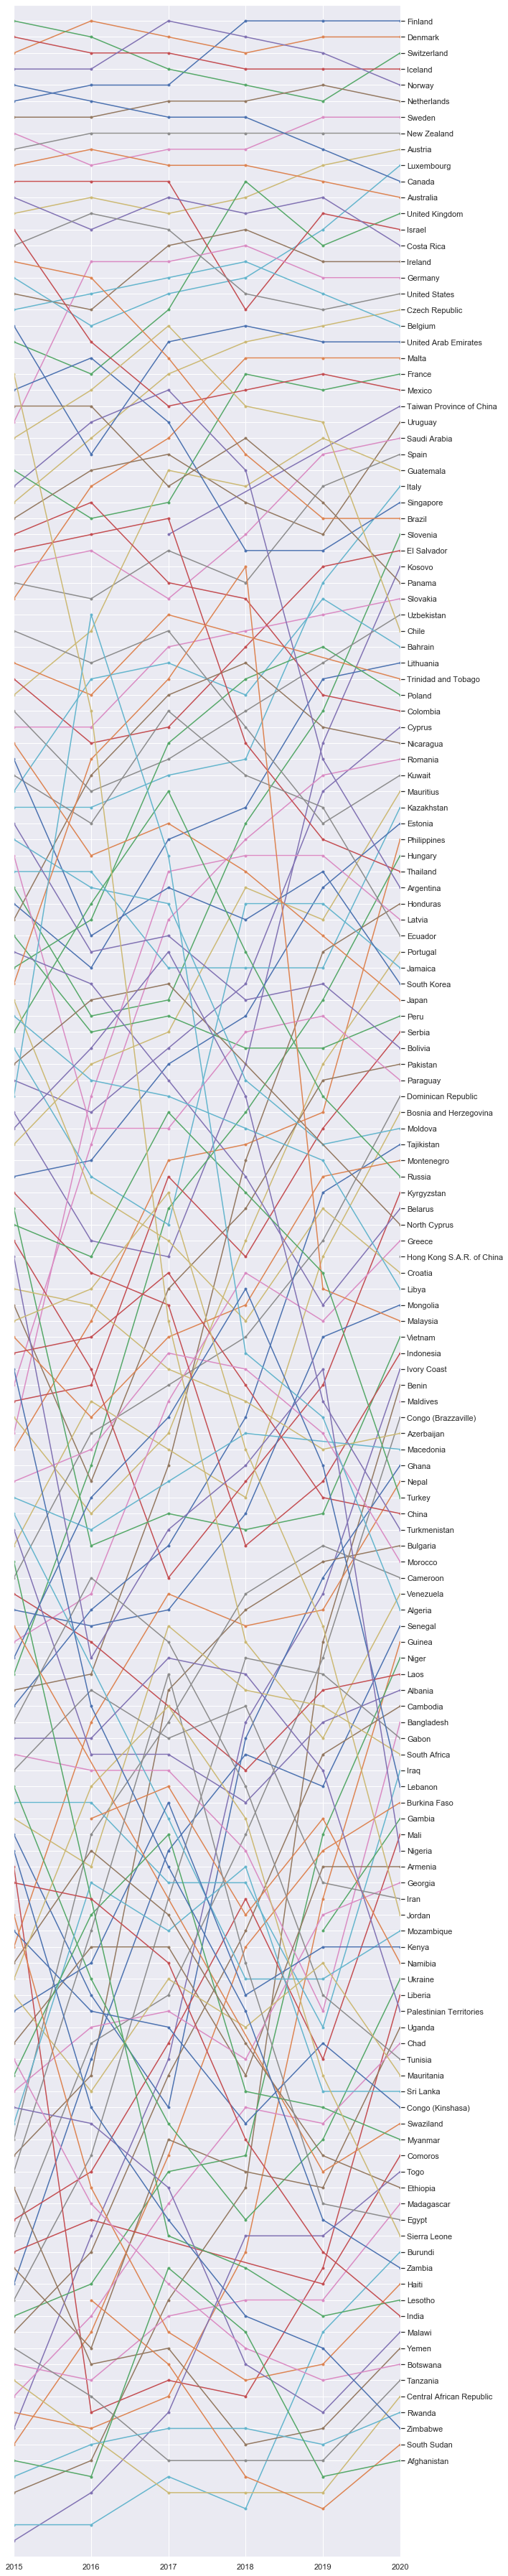

In [28]:
plt.figure(figsize=(10,50))
rank2020 = rank_table['2020'].dropna()

for c in rank2020.index: # c = 2020년 순위별 나라이름
    t = rank_table.loc[c].dropna() # 2020년 순위별기준 연도별 순위를 보여준다. dropna통해서 빈 데이터 그냥 드랍.
    plt.plot(t.index, t, '.-')
    
plt.xlim(['2015', '2020'])
plt.ylim([0, rank_table.max().max() +1 ]) #연도별 최고점 그 중에서도 최고점을 끝으로 정한다. +1은 타이트함 방지
plt.yticks(rank2020, rank2020.index)
ax = plt.gca() # 시각화자료를 받아오는 것.
ax.invert_yaxis() # 순위 정반대로 (1순위부터)

ax.yaxis.set_label_position('right')
ax.yaxis.tick_right() # y축 라벨과 점수를 같이 이동시켜줘야 보기에 용이

plt.tight_layout()
plt.show()

#### 분야별 상위 20개국 점수 현황

In [31]:
data = df_all[df_all['year'] == '2020']
data = data.loc[data.index[:20]]
d = data[data.columns[4:]].cumsum(axis=1) 
#  누적합 pd.cumsum()

d

,economy,family,health,freedom,generosity,trust,residual
782,1.285190,2.784715,3.745987,4.408304,4.567974,5.045831,7.808666
783,1.326949,2.830398,3.809730,4.474770,4.717564,5.212824,7.645565
784,1.390774,2.863178,3.903711,4.532665,4.801721,5.209667,7.559934
785,1.326502,2.874069,3.874913,4.536893,4.899223,5.043764,7.504452
786,1.424207,2.919380,3.927452,4.597653,4.885638,5.319738,7.488005
787,1.338946,2.802592,3.778268,4.391894,4.728212,5.096781,7.448898
788,1.322235,2.755583,3.742053,4.392351,4.665179,5.107245,7.353545
789,1.242318,2.729536,3.737675,4.384465,4.710191,5.171459,7.299567
790,1.317286,2.754730,3.755664,4.359033,4.614543,4.895799,7.294245
791,1.536676,2.924204,3.910647,4.520784,4.716738,5.083780,7.237480


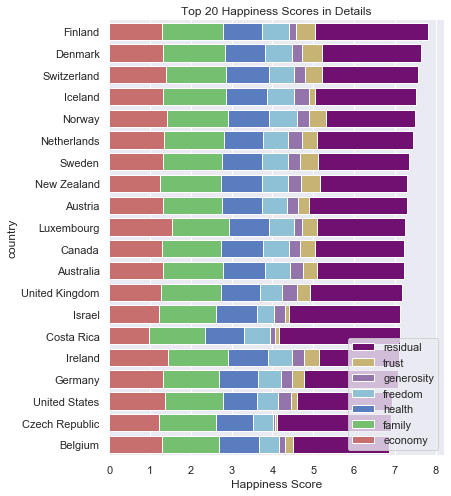

In [34]:
# 누적합 가시화를 위해 d 뒤집어줌. residual 변수가 가장 많은 파이를 차지하기 때문.

data = df_all[df_all['year'] == '2020']
data = data.loc[data.index[:20]]
d = data[data.columns[4:]].cumsum(axis=1) 
#  누적합 pd.cumsum()

plt.figure(figsize=(6,8))

d = d[d.columns[::-1]]
d['country'] = data['country']

sns.set_color_codes('muted')
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'purple'][::-1]
for idx, c in enumerate(d.columns[:-1]):
    sns.barplot(data=d, x=c, y='country', label=c, color=colors[idx])
    
plt.legend(loc= 'lower right')
plt.title('Top 20 Happiness Scores in Details')
plt.xlabel('Happiness Score')
sns.despine(left=True, bottom=True)

#### 컬럼 간 상관성 시각화

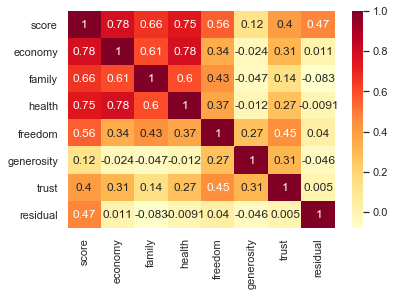

In [36]:
sns.heatmap(df_all.drop('rank', axis=1).corr(), annot=True, cmap='YlOrRd')

- 점수가 경제와 건강과 상관성이 높다. 그 다음으로는 가족과 자유정도 나머지 요소들 순이다.
- Residual 변수와 다른 변수간의 상관관계가 낮게 표현되는데 이는 나머지 변수에서 포착하지 못했던 것들을 residual이 가지고 있기 때문이다. 
- 경제와 건강간의 높은 상관성이 주목할만하다.

## 데이터 전처리

- 애초에 score는 다 표현되었기에 큰 의미가 있진 않음. 나머지 변수들로 residual을 예측해보는것이 의미가 있을 수 있음.

In [39]:
col_in= ['economy', 'family', 'health', 'freedom', 'generosity', 'trust']
col_out = 'residual'

### 학습데이터 테스트 데이터 분리
- 2015~2019년도를 학습데이터 2020년도를 테스트데이터로 분리한다.

In [40]:
df_train = df_all[df_all['year'] != '2020']
df_test = df_all[df_all['year'] == '2020']

X_train = df_train[col_in]
y_train = df_train[col_out]
X_test = df_test[col_in]
y_test = df_test[col_out]

### 수치형 데이터 표준화

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_norm = scaler.transform(X_train)
X_train = pd.DataFrame(X_norm, index=X_train.index, columns=X_train.columns)

X_norm = scaler.transform(X_test)
X_test = pd.DataFrame(X_norm, index=X_test.index, columns=X_test.columns)

- 지금까지 진행한 표준화 과정이랑 다른데 기존에 학습-테스트 데이터 분리가 자동적으로 이루어졌다면 지금은 2020년도를 테스트 데이터로 수동적으로 설정. 이에 표준화 과정 역시 X를 한꺼번에 하는것이 아닌 나누어서 진행하였다.
- scaler.fit 역시 학습데이터로만 진행하였는데 이 의미는 테스트 데이터를 더욱 철저하게 하겠다는 의미와 동일하고 모델을 통해 결과값을 예측한다기보다 검증적인 측면이 크기 때문에 이 방법 역시 유효하다 할 수 있다.

## 모델 학습 및 평가

### Linear 모델

In [44]:
from sklearn.linear_model import LinearRegression

In [46]:
df_all[df_all['trust'].isna()]

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
489,2018,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2.762


- 해당 데이터 때문에 모델 적용이 불가능했는데 연산하여 보면 score 점수가 맞음.
- 즉 trust 점수가 0점. 0점으로 바꾸어준다.

In [47]:
X_train.fillna(0, inplace=True)

In [48]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

pred = model_lr.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

0.44680181487187914
0.5629470546494035


### XGBoost 모델

In [53]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [56]:
pred = model_xgb.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

0.4846164752194342
0.6176769268710504
